## Machine Learning Demo: Classification of Wisconsin Breast Cancer Diagnosis in patients

### Scikit-Learn (python)

by John Ryan

<div class="alert alert-block alert-info" style="margin-top: 20px">**Note:** Citation:  Data Source: Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. UCI Machine learning Repository http://archive.ics.uci.edu/ml/datasets.html.</div>



For the purpose of this analysis we will look to machine learning as a method to predict diagnosis of cancers.

**Question:** How do we predict the cancer status of a patient given their health measurements?

#### Contents

1. Load the data to a pandas data frame.
2. Missing Value Detection
3. Encode Labels for Feature Importance Extra Tree Classifier 
4. Feature Selection - Selecting only highly prdictive features using random forest Model
5. Feature Ranking
6. Uni-Variate / Bi-Variate Anaylsis
7. Cross Validation Train/Test Split
8. Creating a Logistic Regression Model
9. Evaluate Model Performance:
10. Classification Accurracy: % of correct predictions
11. Null Accuracy: Accuracy that could be achieved by always predicting most frequent class
12. Confusion Matrix
13. Mis - classification Rate
14. Sensitivity (recall) & Specificity 
15. False Positive Rate
16. Sensitivity
17. Adjusting the Classification to Threshold (0.3) to improve Model performance
18. Analysis the distribution of new class distribution after threshold adjustment
    

----------------------------------------------------------------------------------------------------------------------

#### Import packages

In [1]:
import os
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore", category=DeprecationWarning,
                       module="pandas, lineno=570")
from __future__ import print_function
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import log_loss, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

**Load the data to a pandas data frame**

In [2]:
#Load the data to a pandas data frame.
df = pd.read_csv("C:\\data\\wisc_bc_data.csv")
df.head()# print the first five rows of the data frame

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Describe the dataset 
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


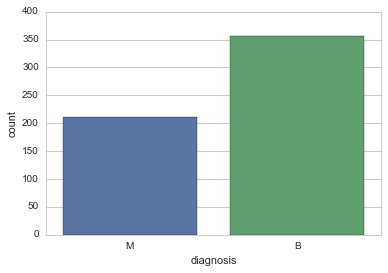

In [4]:
#feature response variable (Y = target) M = Malignant B= Benign 
sns.countplot(x="diagnosis", data=df)

The first variable is an integer variable named id. As this is simply a unique identifier (ID) for each patient in the data, it does not provide useful information and we will need to exclude it from the model.

In [5]:
del df['id']#delete the ID as not required
df.tail()#view last few rows of the data set

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**Missing Value Detection**

In [6]:
print("Number of NA values : {0}".format((df.shape[0] * df.shape[1]) - df.count().sum()))

Number of NA values : 0


**Radial Visualization of features by Diagnosis**

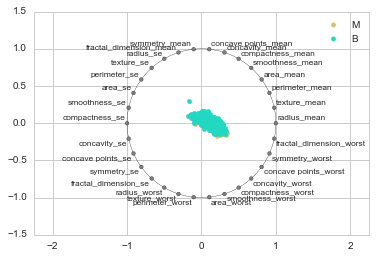

In [7]:
from pandas.tools.plotting import radviz
radviz(df, "diagnosis");

In [8]:
XE = df
YE = df.diagnosis

**Encode Labels for Feature Importance Extra Tree Classifier ** 

In [9]:
#One hot encoder that turns the string labels in to a format for the algorithm
for feature in XE.columns:
    if XE[feature].dtype=='object':
        le = LabelEncoder()
        XE[feature] = le.fit_transform(XE[feature])
XE.tail(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**Feature Selection - Selecting only highly prdictive features using random forest Model**

In [10]:
#Feature Importance - selecting only highly prdictive features using random forest Model
from sklearn.ensemble import ExtraTreesClassifier
df.shape
# feature extraction
model = ExtraTreesClassifier(n_estimators = 250, max_features = "auto", random_state=0)
model.fit(XE, YE)
print(model.feature_importances_)

[ 0.40185926  0.04220558  0.01095037  0.02167439  0.03424769  0.0036195
  0.01177978  0.04854262  0.05861388  0.00344996  0.0019013   0.01265307
  0.00184723  0.01242945  0.01882787  0.0019354   0.00202329  0.0040758
  0.00423104  0.00152555  0.00172974  0.05300822  0.01229509  0.04919915
  0.04729567  0.0092959   0.02478544  0.02328619  0.07024402  0.00623683
  0.00423072]


**Important Feature Ranking**

In [11]:
#Ranking the most imporatnt predictive variables potentially build model based on top ranked i.e 1 -16
featureimportance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(featureimportance)[::-1]
#Print top ranked predictive features
print("Feature ranking:")

for feature in range(XE.shape[1]):
    print("%d. feature %d (%f)" % (feature + 1, indices[feature], featureimportance[indices[feature]]))   

Feature ranking:
1. feature 0 (0.401859)
2. feature 28 (0.070244)
3. feature 8 (0.058614)
4. feature 21 (0.053008)
5. feature 23 (0.049199)
6. feature 7 (0.048543)
7. feature 24 (0.047296)
8. feature 1 (0.042206)
9. feature 4 (0.034248)
10. feature 26 (0.024785)
11. feature 27 (0.023286)
12. feature 3 (0.021674)
13. feature 14 (0.018828)
14. feature 11 (0.012653)
15. feature 13 (0.012429)
16. feature 22 (0.012295)
17. feature 6 (0.011780)
18. feature 2 (0.010950)
19. feature 25 (0.009296)
20. feature 29 (0.006237)
21. feature 18 (0.004231)
22. feature 30 (0.004231)
23. feature 17 (0.004076)
24. feature 5 (0.003620)
25. feature 9 (0.003450)
26. feature 16 (0.002023)
27. feature 15 (0.001935)
28. feature 10 (0.001901)
29. feature 12 (0.001847)
30. feature 20 (0.001730)
31. feature 19 (0.001526)


**Results:** Top predictive variables 

In [12]:
#Create Y and X matrix with newly selected features outputted from the previous stage
feature_cols = ['concave points_mean','radius_worst', 'area_worst','symmetry_worst','concavity_mean']
X = df[feature_cols]
y = df.diagnosis

**Uni-variate / Bi-variate Analysis**

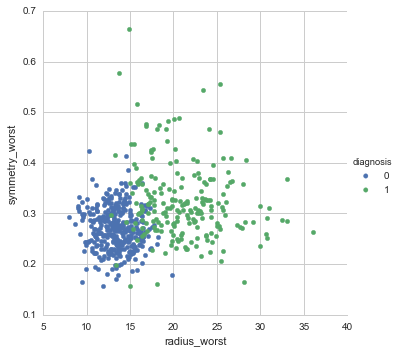

In [13]:
sns.FacetGrid(df, hue="diagnosis", size=5) \
   .map(plt.scatter, "radius_worst", "symmetry_worst") \
   .add_legend();

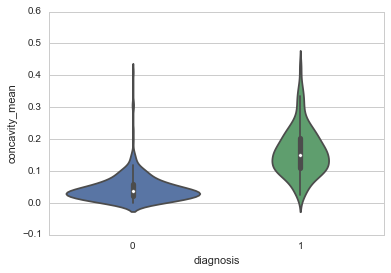

In [14]:
sns.violinplot(x="diagnosis", y="concavity_mean", data =df);

**Cross Validation Train/Test Split** 

Split the data into x and y into training and test sets

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


__Machine Learning: Creating A set of Predictive Models__

** Creating a Logistic Regression Model**

Despite its name Logistic regression is a very powerful classification model where the dependent variable is categorical. In logistic regression we use a "hypothesis class" to make a prediction that a given new example belongs to Benign class Vs the probability that it belongs to the Malignant class. 

In [16]:
#Classification model
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
# during the fitting process the model is learning the relationship between X_train & y_train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Make class predictions for the test set**

First we pass X_test the feature matrix for the testing set to the predict () method 
for the fitted model

In [17]:
#make class predictions for the test set
#we pass X_test the feature matrix for the testing set to the predict () method 
#for the fitted model
y_predict_class = LRmodel.predict(X_test)
#outputs a class prediction 1 or 0 for every observation in the testing set which
#is then stored in an object called y_pred_class

**Evaluate Model Performance:**

**Metric 1: Classification Accurracy: % of correct predictions**

For the test set the accuracy score function can tell us what percentage of the predictions in y_pred_class are correct.

In [18]:
# calculate accurracy pass y_test and y_predict_class to the accurracy score function
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_predict_class))#y_test contains true response values
#for the test set the accuracy score function can tell us what percentage of the predictions in 
#y_pred_class are correct.

0.93006993007


**Metric 2: Null Accuracy: Accuracy that could be achieved by always predicting most frequent class**

Analysis the class distribution of the test set. When we evaluate the class distribution counts below we see that the 0 value is present 90 times and the 1 value is present 53 times. Null accuracy tests that if this model was to predict the dominant class 100% of the time, how often would it be correct.

In [19]:
#display the class distribution
y_test.value_counts()

0    90
1    53
Name: diagnosis, dtype: int64

In [20]:
##the below y_test only contains ones and zeros.
#Calcualte the percent of 1's by taking the mean()
y_test.mean()

0.3706293706293706

Result: 37% of the values in y_test are ones 

In [21]:
#calcualte percentage of zero's 
1 - y_test.mean()

0.6293706293706294

**Results:** 63% as this is greather than 37% we can safely suggest that this is the null accuracy for this question. The model will predict 63% of the time that the patient will not have a milignant diagnosis 63% of the time, this is not to useful but will provide a basis of what we can compare our logit model against. If we compare the classification accuracy of 93% of our model above to our null accuracy we cleary see that the classification accuracy does not tell us anything about the underlying distribution of the test set and does not tell us what type of errors outr model is making.

In [22]:
#code for null accuracy binary problem zero & one
#max(y_test.mean(), 1 - y_test.mean())

In [23]:
#Code for null accuracy multiclass problem 
#y_test.value_counts().head(1)/len(y_test)

In [24]:
#Print out true and predicted responses to see a snapshot of some of the errors the model 
#is producing for instance.
print ('True:', y_test.values[0:30])
print ('Pred:', y_predict_class[0:30])

True: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1]
Pred: [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1]


**Metric 3: Confusion Matrix**

A table that assesses the performance of a classification model

In [25]:
#true values i.e y_test needs to be the first argument otherwise we wont see any errors produced
from sklearn.metrics import confusion_matrix
print (metrics.confusion_matrix(y_test, y_predict_class))

[[85  5]
 [ 5 48]]


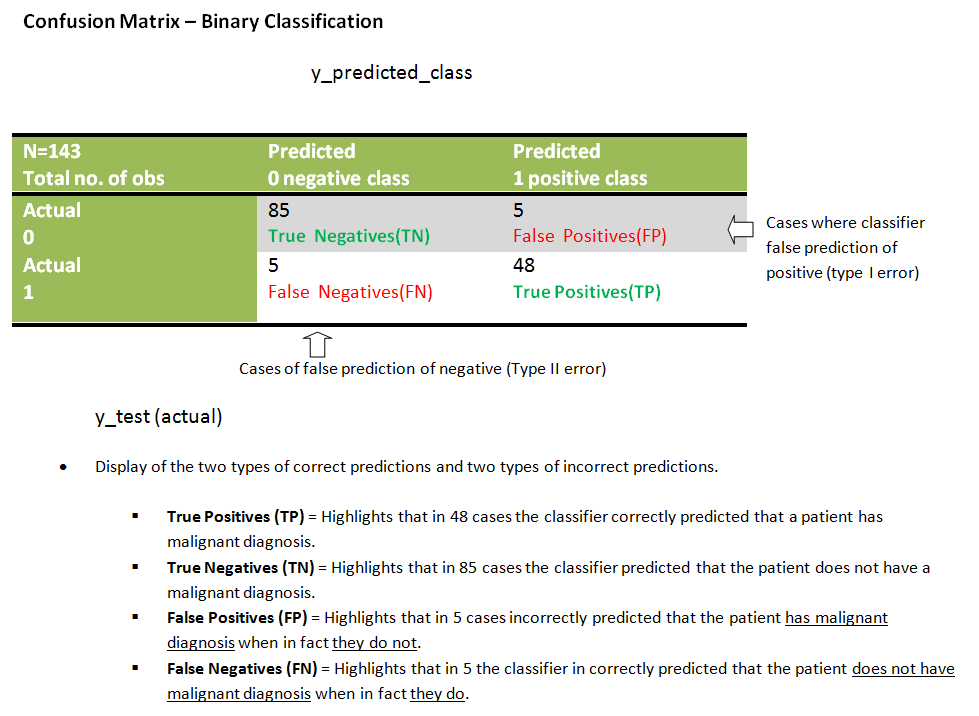

In [26]:
from IPython.display import Image
Image("C:\\data\\CM PSCD.PNG",  width=900, height=600)

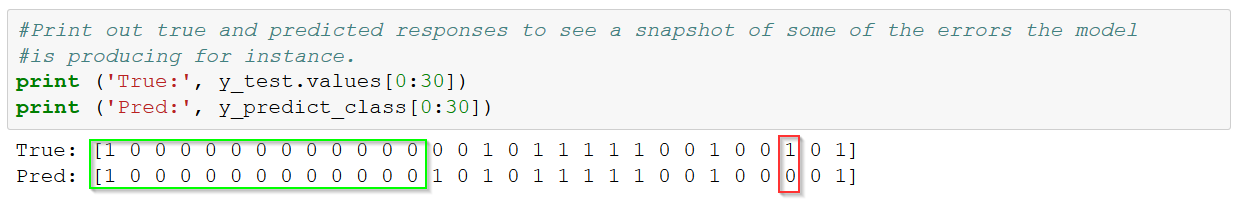

In [27]:
Image("C:\\data\\CM -Prediction of Skin Cancer Diagnosis.PNG",  width=900, height=600)

The graphic above shows some highlighted examples of a mix of true postive and true negative results in green and an example of a false negative results in red.

In [28]:
#1st way to compute the claasification accuracy for confusion matrix
confusion = metrics.confusion_matrix(y_test,y_predict_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [29]:
#classifiaction accuracy score
(TP + TN)/float(TP + TN + FP + FN)

0.93006993006993011

In [30]:
#2nd way to compute the claasification accuracy for confusion matrix
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_predict_class))

0.93006993007


**Metric 4: Mis - Classification Rate**

This is equal to the FP + FN / total observations

In [31]:
# add the FP + FN / float(total)
1 - metrics.accuracy_score(y_test, y_predict_class)

0.069930069930069894

**Metric 5: Sensitivity (recall) & Specificity **

Sensitivity how often is the prediction correct, how sensitive is the classifier to predicting positive instances!

Specificity when the actual value is a negative, how often is the prediction correct? How selective is the model at predicting positive instances

In [32]:
#Sensitivity (recall) TP / float(TP + FN)
metrics.recall_score(y_test, y_predict_class)

0.90566037735849059

In [33]:
#Specificity need to maximise TN/ total
TN /float(TN+ FP)

0.94444444444444442

**Metric 6: False Positive Rate**

The actual value is negative. How often is the prediction incorrect?

In [34]:
#Calculate the False Positive rate
FP / float (TN + FP)

0.055555555555555552

**Metric 6: Precision**

When a positive instance is predicted, how often is the prediction correct

In [35]:
#precision TP/float(TP + FP)
metrics.precision_score(y_test, y_predict_class)

0.90566037735849059

**Improving Performance: Changing the Classification Threshold to assist the performance model**

In [36]:
#Print first 10 predictions of the logistic regression model
LRmodel.predict(X_test)[0:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Print the first 10 prediction probabilities for class membership

left colunm shows predicted probability of class zero

Right shows predicted probabilty of class one

In [37]:
#Print the first 10 prediction probabilities for class memebership
#left colunm shows predicted probably of class zero
#Right shows "" "" of class one
LRmodel.predict_proba(X_test)[0:10, :]

array([[ 0.4050764 ,  0.5949236 ],
       [ 0.92001903,  0.07998097],
       [ 0.87160313,  0.12839687],
       [ 0.60269255,  0.39730745],
       [ 0.96295384,  0.03704616],
       [ 0.97194111,  0.02805889],
       [ 0.97212734,  0.02787266],
       [ 0.97287178,  0.02712822],
       [ 0.99229454,  0.00770546],
       [ 0.98964261,  0.01035739]])

In [38]:
#predicted probabilties of class 1
y_predicted_prob = LRmodel.predict_proba(X_test)[:,1]
y_predicted_prob

array([ 0.5949236 ,  0.07998097,  0.12839687,  0.39730745,  0.03704616,
        0.02805889,  0.02787266,  0.02712822,  0.00770546,  0.01035739,
        0.34819238,  0.34401188,  0.00839074,  0.8844614 ,  0.34883838,
        0.9683782 ,  0.01119844,  0.99999891,  0.99632126,  0.99999988,
        0.74553776,  0.880426  ,  0.10462839,  0.04127744,  0.99978523,
        0.05868857,  0.02264456,  0.23895241,  0.1039025 ,  0.999999  ,
        0.04023106,  0.99999967,  0.17854556,  0.98354996,  0.01078724,
        0.61427741,  0.16304831,  0.99983723,  0.189259  ,  0.90804021,
        0.73939874,  0.00880361,  0.9733486 ,  0.01241581,  0.22477001,
        0.99999991,  0.00725354,  0.14098749,  0.03127663,  0.82215601,
        0.99760753,  0.34708804,  0.99994205,  0.02883654,  0.04321303,
        0.02341593,  0.02208396,  0.0421101 ,  0.04198372,  1.        ,
        0.3646413 ,  0.99039895,  0.02178728,  0.07921516,  0.99944056,
        0.04552427,  1.        ,  0.99676009,  0.99997142,  0.01

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size']=12

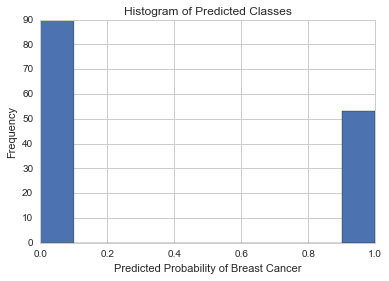

In [40]:
#Analysis the distribution of class distribution
plt.hist(y_predict_class, bins= 10)
plt.xlim(0,1)
plt.title('Histogram of Predicted Classes')
plt.xlabel('Predicted Probability of Breast Cancer')
plt.ylabel('Frequency')

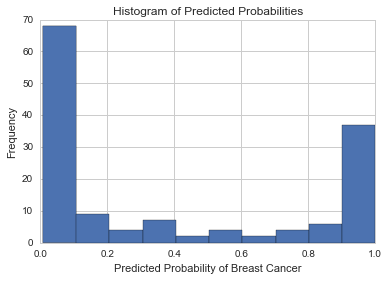

In [41]:
#Analysis the distribution of a numerical variable
plt.hist(y_predicted_prob, bins= 10)
plt.xlim(0,1)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Breast Cancer')
plt.ylabel('Frequency')

When we analyze the the histagram to see if we can adjust the classification threshold i.e 0.5 to improve the performance of the model. We see that that the first bar has about 69 percent of the observations had values between 0.0 and 0.1. 

We see that class 1 on the far right is predicted 38% of the time. If we adjust the classification threshold for example from 0.5 to 0.4 we can alter the sensitivity & Specificity(inverse relationship). 

The increase of Sensitivity in this way can shift many of the obervations predicted above the threshold into class 1 making the model more sensitive to positive instances.

**Adjusting the Classification to Threshold (0.3) to Improve Model performance**

Next we will experiment with this concept and lower the threshold;

In [42]:
#alter the default predict probabilty to 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_predicted_prob, 0.3)[0]

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [43]:
#print the first 10 predicted probabilities with lower threshold
y_predicted_prob[0:10]

array([ 0.5949236 ,  0.07998097,  0.12839687,  0.39730745,  0.03704616,
        0.02805889,  0.02787266,  0.02712822,  0.00770546,  0.01035739])

In [44]:
#print the first 10 predicted classes with lower threshold
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

**Confusion Matrix at Default Threshold 0.5**

In [45]:
#previous confusion matrix before threshold change (default 0.5)
confusion

array([[85,  5],
       [ 5, 48]])

**Confusion Matrix at new Threshold 0.3**

In [46]:
#new confusion matrix (threshold 0.3)
metrics.confusion_matrix(y_test, y_pred_class)

array([[79, 11],
       [ 2, 51]])

Specificity i.e TN /float(TN+ FP) has decreased from 94% to 91% as oberservations moved 
from left to right colunm meaning FP will increase and TN will decrease. 

**Sensitivity/ Recall (New)**

In [47]:
#Sensitivity (recall) TP / float(TP + FN) has gone from 90% previous to 96%
metrics.recall_score(y_test, y_pred_class)

0.96226415094339623

**Specificity (New)**

In [48]:
#Specificity TN /float(TN+ FP) has decreased from 94% to 91% as oberservations moved 
#from left to right colunm meaning FP will increase and TN will decrease. 
51/ float(51 + 5)

0.9107142857142857

**Analysis the distribution of new class distribution after threshold adjustment**

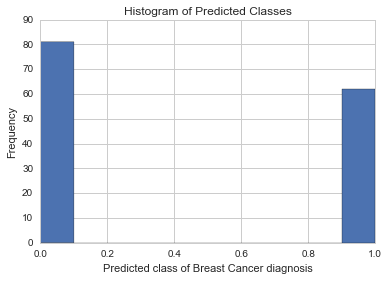

In [49]:
#Analysis the distribution of new class distribution
plt.hist(y_pred_class, bins= 10)
plt.xlim(0,1)
plt.title('Histogram of Predicted Classes')
plt.xlabel('Predicted class of Breast Cancer diagnosis')
plt.ylabel('Frequency')

**Area Under AUC Curve**

The ROC curve helps to select a threshold value that balances sensitivity and specificity in a way that makes sense.

AUC is a popular metric. I believe it is a good metric given the unbalaced classes seen above. It is used to judge predictions in binary response (0/1) problem. It is only sensitive to the order determined by the predictions and not their magnitudes.

For other evaluation methods, a user has to choose a cut-off point above which the target variable is part of the positive class (e.g. a logistic regression model returns any real number between 0 and 1 - the modeler might decide that predictions greater than 0.5 mean a positive class prediction while a prediction of less than 0.5 mean a negative class prediction). AUC evaluates entries at all cut-off points, giving better insight into how well the classifier is able to separate the two classes.

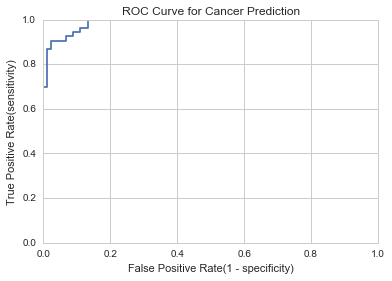

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for Cancer Prediction')
plt.xlabel('False Positive Rate(1 - specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.grid(True)